In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def tn_approx(x,n):
    tot = 1.
    term = 1.
    for jj in xrange(1,n+1):
        term *= -x**2./((2*jj+1)*(2*jj))
        tot += term
    return x*tot

# Part Three: Taylor's Remainder Theorem 

Again, suppose we have a function $f(x)$ which is smooth, i.e. infinitely differentiable, in some interval say $(x_{0}-\delta,x_{0}+\delta)$, we say $f(x)$ has a Taylor series _ around _ $x_{0}$ if on the interval we can write

$$
f(x) = \sum_{j=0}^{\infty}\left.\frac{d^{j}f}{dx^{j}}\right|_{x=x_{0}}\frac{(x-x_{0})^{j}}{j!}, ~ x\in[x_{0}-\delta,x_{0}+\delta].
$$

As we hinted at in the last section, it would be nice to have a means of knowing in advance how well a given approximation will do over a chosen interval.  This is the point of what is called _ Taylor's Remainder Theorem _.  

**Taylor's Remainder Theorem**: Let $f(x)$ be a smooth function which has the Taylor series  

$$
f(x) = \sum_{j=0}^{\infty} \left.\frac{d^{j}f}{dx^{j}}\right|_{x=x_{0}} (x-x_{0})^{j}, ~ x \in [x_{0}-\delta,x_{0}+\delta].
$$

The $n^{th}$-order Taylor series approximation $T_{n}(x)$ is given by 

$$
T_{n}(x) = \sum_{j=0}^{n} \left.\frac{d^{j}f}{dx^{j}}\right|_{x=x_{0}} (x-x_{0})^{j},
$$

The error in using the approximation $T_{n}(x)$ is given by 

$$
f(x) - T_{n}(x) = \frac{1}{(n+1)!}\left.\frac{d^{n+1}f}{dx^{n+1}}\right|_{x=\xi}(x-x_{0})^{n+1},
$$

where for $x\in[x_{0}-\delta,x_{0}+\delta]$, $\xi \in (\mbox{min}(x,x_{0}),\mbox{max}(x,x_{0}))$.

___

Now the role of this point $\xi$ is a bit mysterious.  The best way to understand it is to take a step back and remember the _ Mean Value Theorem _ from Calculus.

**Mean Value Theorem**: For a differntiable function $f(x)$, where $x\in[a,b]$, there exists a point $\xi\in(a,b)$ such that 

$$
f'(\xi) = \frac{f(b)-f(a)}{b-a}.
$$

![MVT](https://upload.wikimedia.org/wikipedia/commons/9/94/Mittelwertsatz3.svg)

___

What this says in words is that if we construct a secant line from $f(x)$ between $a$ and $b$, then there must be some point in $[a,b]$, say $\xi$, such that the slope of the tangent line at $\xi$ is the same as the slope of the secant line.  However, what the theorem **does not** tell us is where $\xi$ is.  And there does not have to be just one value of $\xi$ as the following image shows.

![MVT_nounique](https://upload.wikimedia.org/wikipedia/commons/f/f9/Mittelwertsatz6.svg)

Thus, if we choose 

$$
a = \mbox{min}(x,x_{0}), ~ b = \mbox{max}(x,x_{0}),
$$

then we see that Taylor's Remainder Theorem is is a generalization of the Mean Value Theorem, or the Mean Value Theorem is just Taylor's Remainder Theorem for $n=0$.  Thus, Taylor's Remainder Theorem inherits the same degree of uncertainty that the Mean Value Theorem has.  

So then, if Taylor's Remainder Theorem has this kind of uncertainty, what good does it do us to have it?  The answer to this question is that if we could exactly compute error, then we could exactly compute anything we like.  Thus, Taylor's Remainder Theorem is useful in so far as it allows us to _ approximate _ error.  Thus the way to use it is in the form 

$$
\left|f(x) - T_{n}(x)\right| \leq \frac{1}{(n+1)!}\max_{x\in[x_{0}-\delta,x_{0}+\delta]}\left|\frac{d^{n+1}}{dx^{n+1}}f(x)\right|\left|x-x_{0}\right|^{n+1}.
$$

Note the appearance of both the absolute values $|\cdot|$ and the inequality $\leq$.  This is something we have to get used to in this course.  Approximation almost always means that equalities have to get turned into inequalities because inequalities represent the uncertainty that approximation necessarily brings.  Such is life.  

Time for an example.  From above, we have for $x_{0}=0$ and $f(x)=\sin(x)$ that 

$$
T_{7}(x) = x - \frac{x^{3}}{3!} + \frac{x^{5}}{5!} - \frac{x^{7}}{7!}.
$$

We can estimate the error in using this as an approximation by using Taylor's Remainder Theorem, which then gives us 

$$
\left|\sin(x) - T_{7}(x) \right| \leq \frac{|x|^{8}}{8!} \max_{x\in(-\infty,\infty)}\left|\frac{d^{8}}{dx^{8}}\sin(x) \right|.
$$

Now since 

$$
\frac{d}{dx}\sin(x) = \cos(x), ~ \frac{d^{2}}{dx^{2}}\sin(x) = -\sin(x), ~ \frac{d^{3}}{dx^{3}}\sin(x) = -\cos(x), ~ \frac{d^{4}}{dx^{4}}\sin(x) = \sin(x),
$$

we see that 

$$
\frac{d^{8}}{dx^{8}}\sin(x) = \sin(x).
$$

We likewise have the fact that 

$$
\left|\sin(x) \right|\leq 1.
$$

So from this, we see that using Taylor's Remainder Theorem and the above estimates, we have 

$$
\left|\sin(x) - T_{7}(x) \right| \leq \frac{|x|^{8}}{8!} = \frac{x^{8}}{8!}.
$$

Let's see how well our estimate for the error does compared to the _ actual error _ $\sin(x)-T_{7}(x)$.  

/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


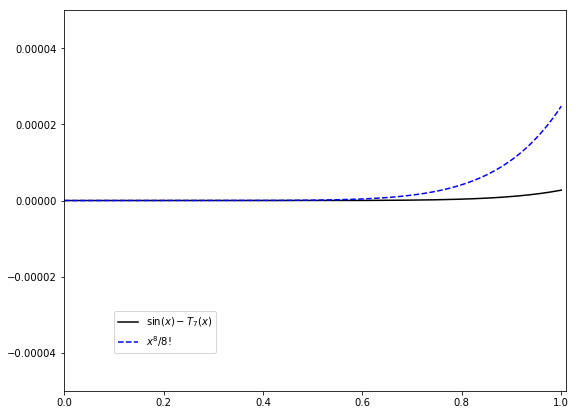

In [16]:
xvals = np.linspace(0,1,2e4)

ex_vals = np.sin(xvals)

t4_app = [tn_approx(xval,3) for xval in xvals]

tr_error = ex_vals - t4_app
ap_error = xvals**8./np.math.factorial(8)

plt.plot(xvals,tr_error,ls="-", color="k", label="$\sin(x)-T_{7}(x)$")
plt.plot(xvals,ap_error,ls="--", color="b", label="$x^{8}/8!$")

plt.legend(loc=(.1,.1))

plt.xlim(0,1.01)
plt.ylim(-5e-5,5e-5)

#plt.axes().set_aspect("equal")

fig=plt.gcf() # get current figure
fig.set_size_inches(9,7) # optional size